Saving cleaned_merged_data.csv to cleaned_merged_data (1).csv


<ipython-input-3-645340b6fb27>:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


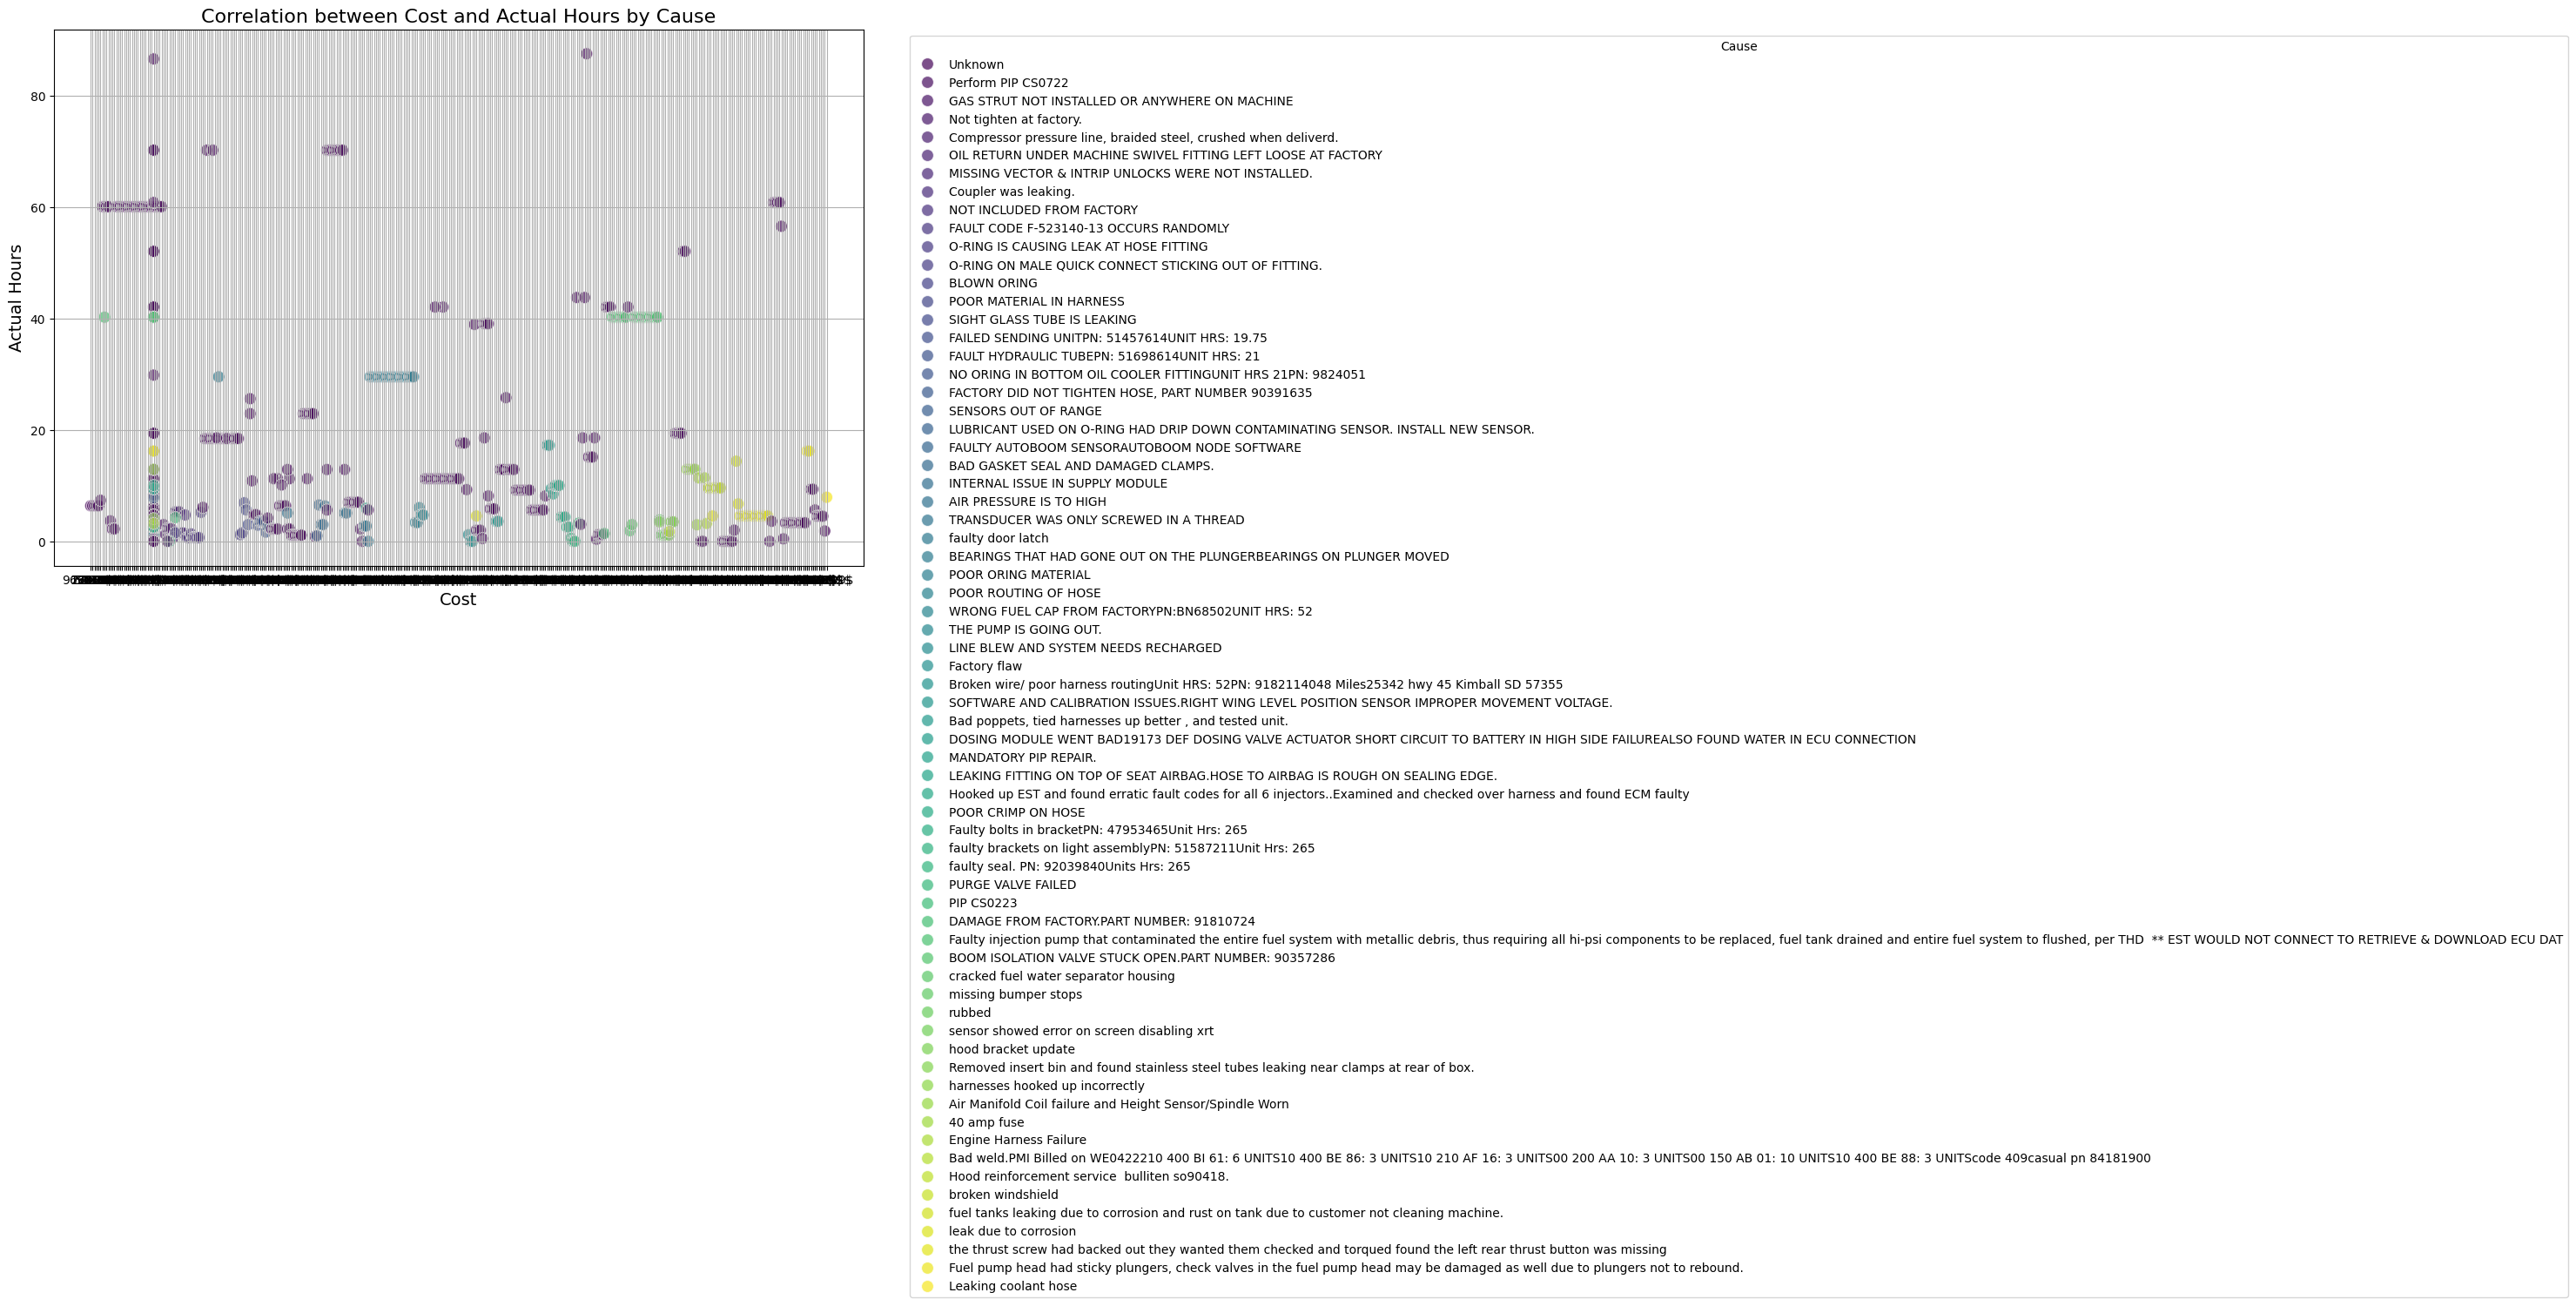

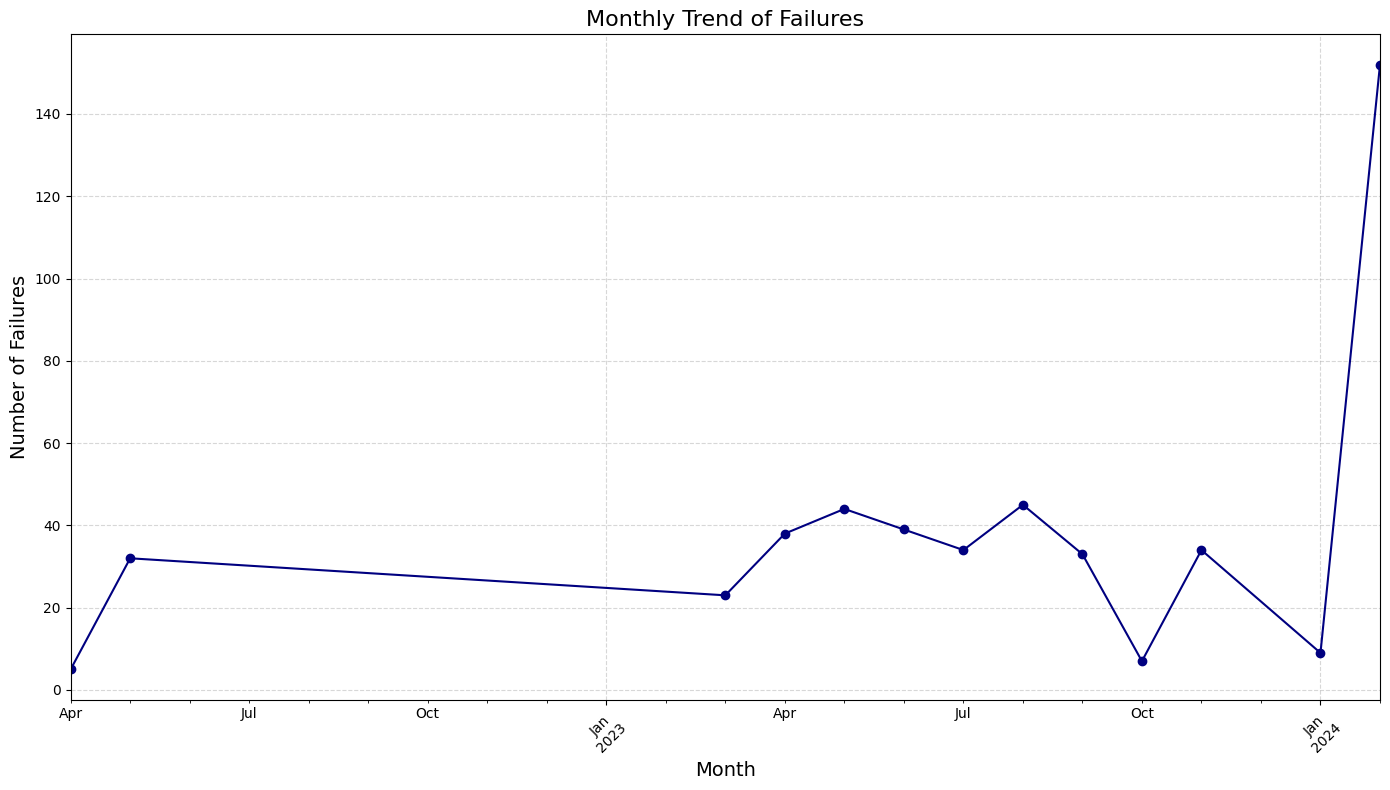

<ipython-input-3-645340b6fb27>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=merged_data['Cause'].value_counts().index, x=merged_data['Cause'].value_counts().values, palette='Spectral')
<ipython-input-3-645340b6fb27>:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


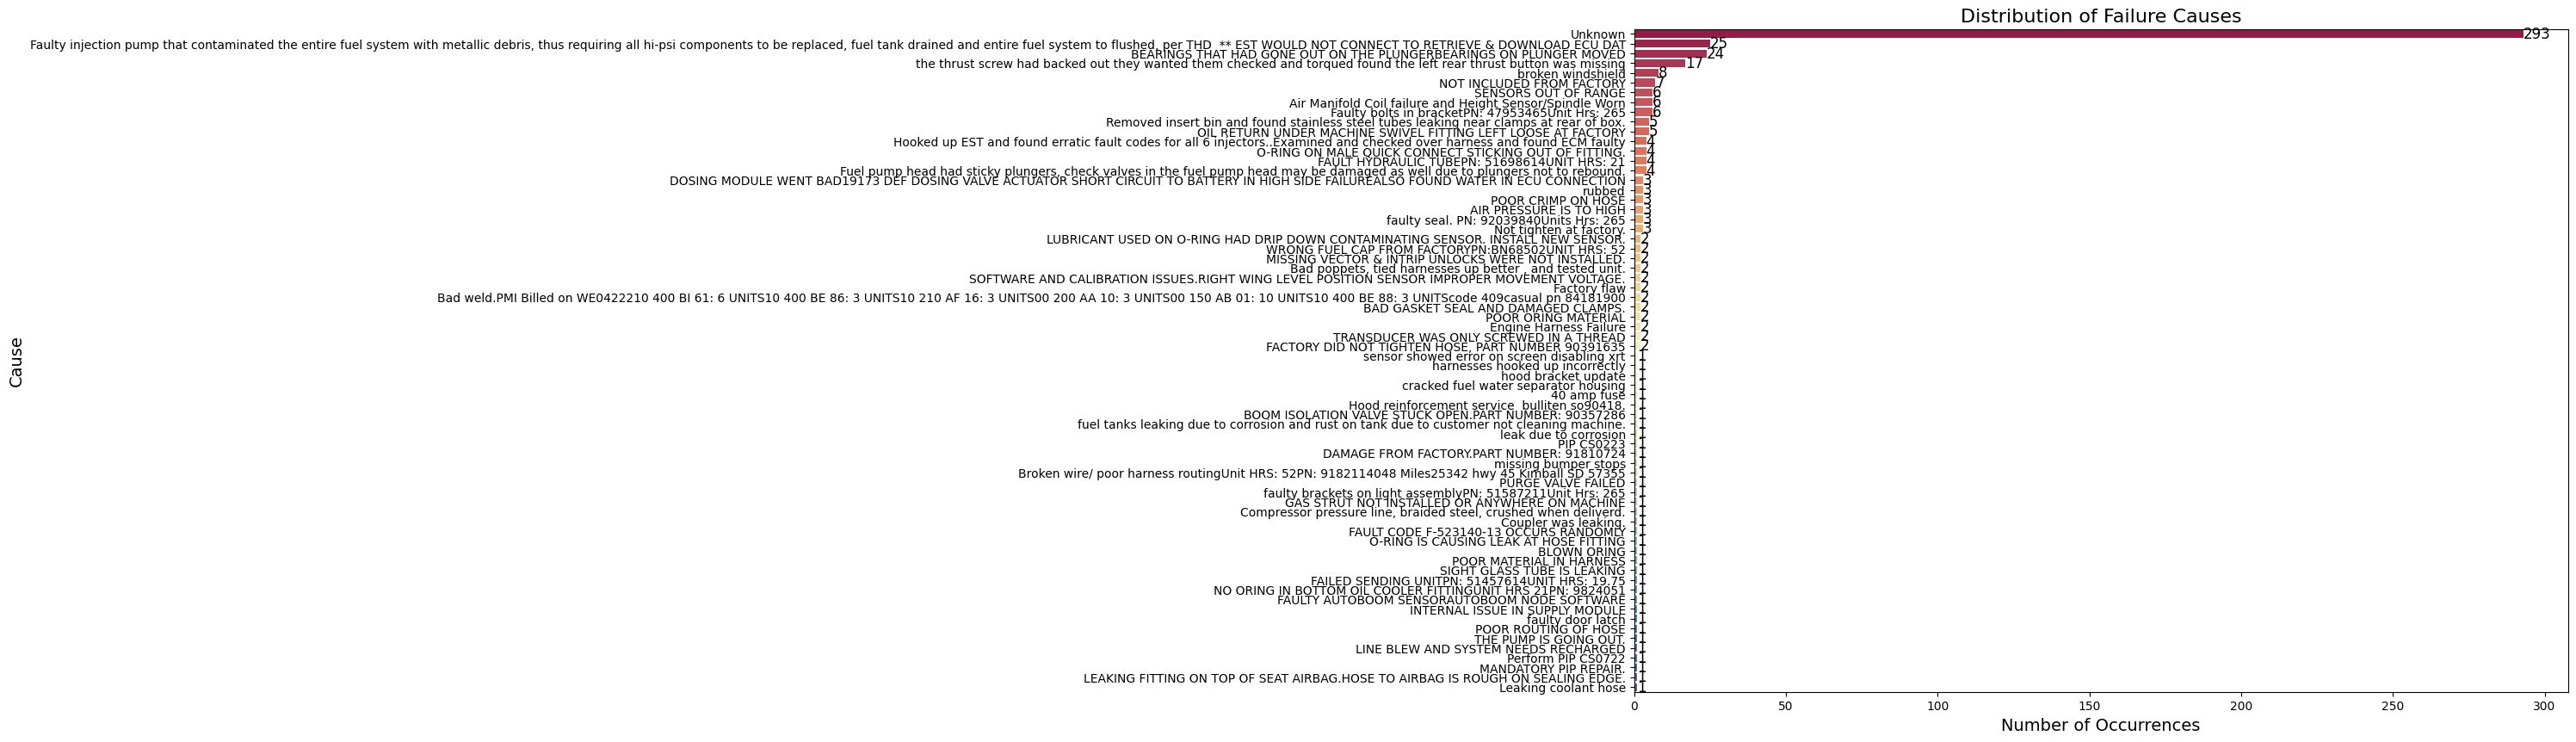

<ipython-input-3-645340b6fb27>:59: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


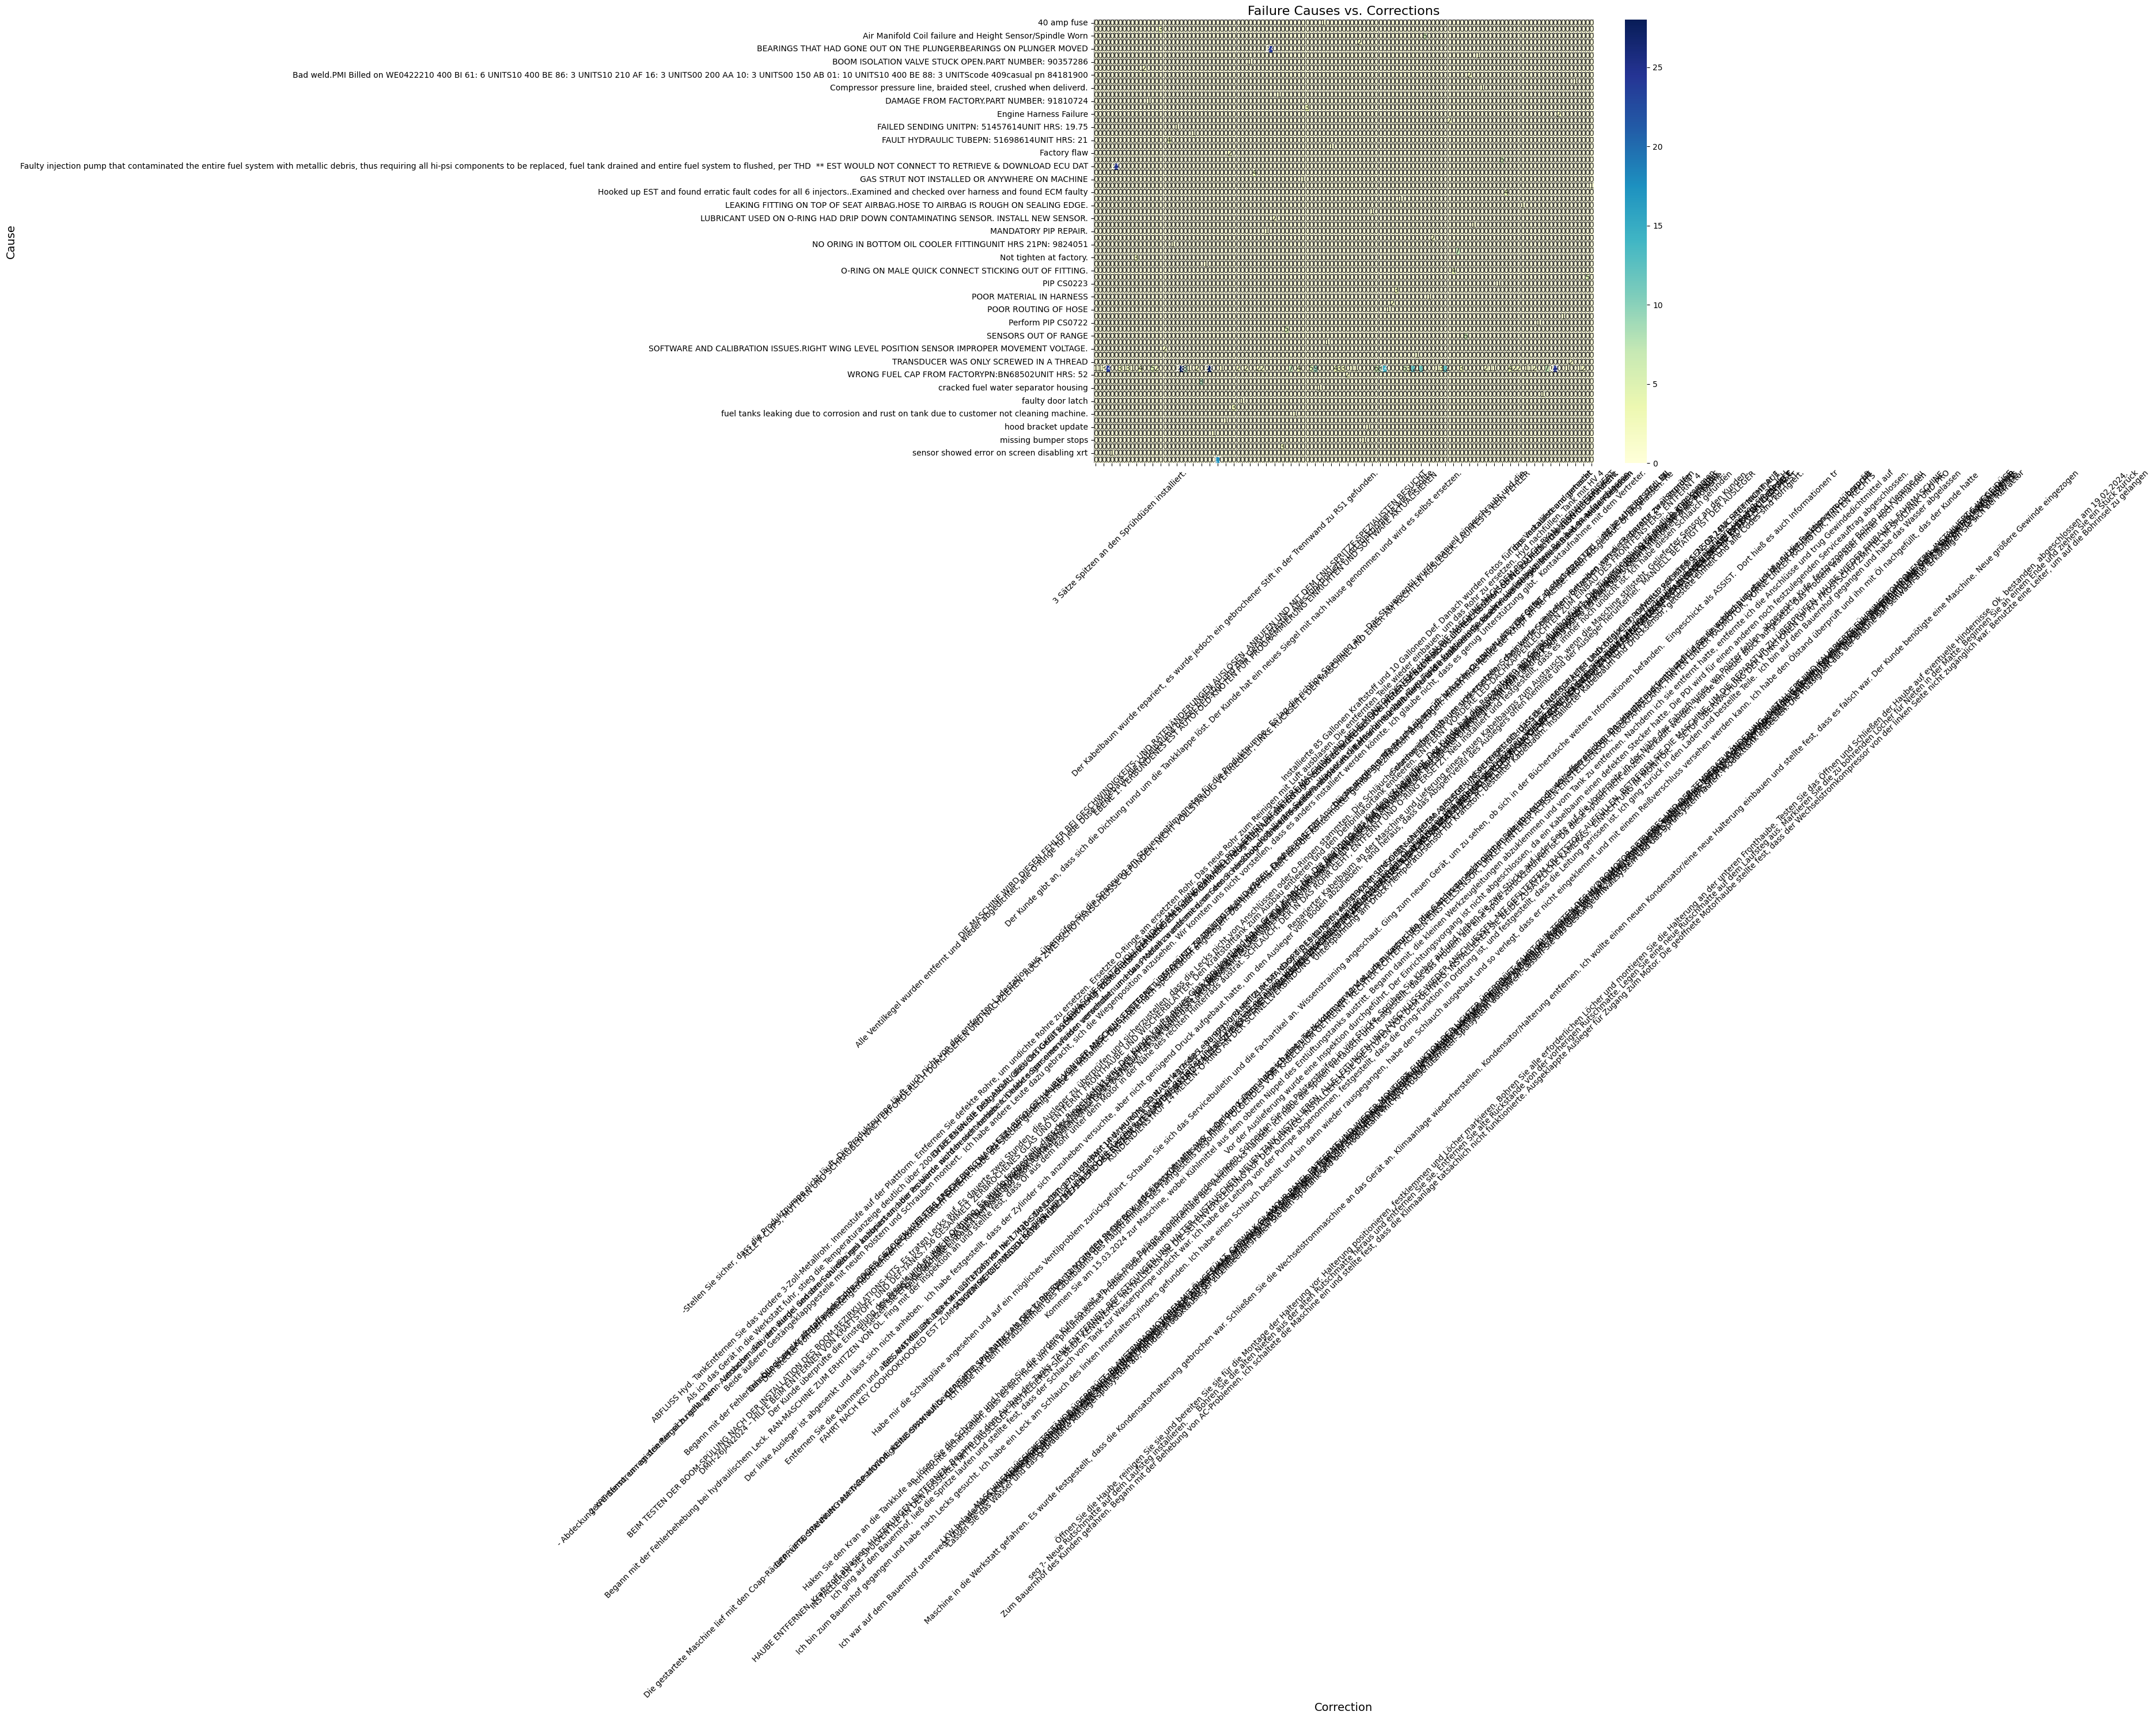

Primary Key Order No_x  Segment Number_x Order Date Manufacturer Model  \
0  SO0005588-1  SO0005588                 1 2022-04-30       PASEIH  6780   
1  SO0005907-1  SO0005907                 1 2022-04-30       PASEIH  6780   
2  SO0006100-1  SO0006100                 1 2022-04-30       PASEIH  6780   
3  SO0006642-1  SO0006642                 1 2022-04-30       PASEIH  6780   
4  SO0018457-1  SO0018457                 1 2022-04-30       PASEIH  6780   

  Product Category  Model Year Serial Number  Meter 1 Reading  ...  \
0             APPL           0     YFT042399        2531.0999  ...   
1             APPL           0     YFT042399        2531.0999  ...   
2             APPL           0     YFT042399        2531.0999  ...   
3             APPL           0     YFT042399        2531.0999  ...   
4             APPL           0     YFT042399        2531.0999  ...   

            Coverage Qty Part Manufacturer          Part Number  \
0  mike 102-305-1811  37              PASE  042094R9-Q     PASE   
1  mike 102-305-1811   1              PASE    25505353     PASE   
2  mike 102-305-1811   3              PASE    25500540     PASE   
3  mike 102-305-1811   1              PASE    30171372     PASE   
4  mike 102-305-1811   1              PASE    MCC54101     PASE   

     Part Description   Revenue      Cost Invoice Date  Actual Hours  \
0    NO.1-15W40 CJ4QT  127.2799  96.1999$        44698        6.3798   
1               FLUID   30.0000    22.68$        44698        6.3798   
2   ACTIFUL OT PREMIX  126.0000     78.3$        44698        6.3798   
3  FILTER  ENGINE OIL  157.5000    99.79$        44698        6.3798   
4             LOCTITE    7.5499   5.5099$        44698        6.3798   

  Segment Total $  
0      1048.3596$  
1      1048.3596$  
2      1048.3596$  
3      1048.3596$  
4      1048.3596$  

[5 rows x 27 columns]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the cleaned and merged dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
merged_data = pd.read_csv(file_name)

# Correlation between failed components and cost/actual hours (Enhanced Scatter Plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='Cost', y='Actual Hours', hue='Cause', alpha=0.7, palette='viridis', s=100, edgecolor='w')
plt.title('Correlation between Cost and Actual Hours by Cause', fontsize=16)
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Actual Hours', fontsize=14)
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Trend analysis of failure conditions over time (Enhanced Line Chart)
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])
failure_trends = merged_data.groupby(merged_data['Order Date'].dt.to_period('M')).size()

plt.figure(figsize=(14, 8))
failure_trends.plot(kind='line', marker='o', linestyle='-', color='navy')
plt.title('Monthly Trend of Failures', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Analysis of the distribution of different failure components (Enhanced Bar Chart)
plt.figure(figsize=(14, 10))
sns.barplot(y=merged_data['Cause'].value_counts().index, x=merged_data['Cause'].value_counts().values, palette='Spectral')
plt.title('Distribution of Failure Causes', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Cause', fontsize=14)

# Adding data labels
for index, value in enumerate(merged_data['Cause'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.show()

# Root Cause Identification: Investigate trends of failure/fix conditions (Enhanced Heatmap)
failure_conditions = merged_data.groupby('Cause')['Correction'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(failure_conditions, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, linecolor='gray')
plt.title('Failure Causes vs. Corrections', fontsize=16)
plt.xlabel('Correction', fontsize=14)
plt.ylabel('Cause', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the first few rows of the dataset to confirm it loaded correctly
merged_data.head()
